# Hackathon : Reinforcement Learning for Drone Navigation

- Team name:
- Team members names:

## 0. Prerequisites

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext autoreload
%autoreload 2

import env
import agent
import reward
import simulate

## 1. Training

In [3]:
trained_agent, all_rewards = simulate.train('config.json')

Episode 1, Step 500, Reward: -299.17, Evacuated: 0, Deactivated: 0
Episode 2, Step 500, Reward: -49824.81, Evacuated: 0, Deactivated: 1
Episode 3, Step 500, Reward: -49125.01, Evacuated: 0, Deactivated: 1
Episode 4, Step 500, Reward: -298.76, Evacuated: 0, Deactivated: 0
Episode 5, Step 500, Reward: -295.67, Evacuated: 0, Deactivated: 0
Episode 6, Step 500, Reward: -296.85, Evacuated: 0, Deactivated: 0
Episode 7, Step 500, Reward: -69890.46, Evacuated: 0, Deactivated: 2
Episode 8, Step 500, Reward: -297.57, Evacuated: 0, Deactivated: 0
Episode 9, Step 500, Reward: -297.88, Evacuated: 0, Deactivated: 0
Episode 10, Step 500, Reward: -298.33, Evacuated: 0, Deactivated: 0
Episode 11, Step 500, Reward: -298.79, Evacuated: 0, Deactivated: 0
Episode 12, Step 500, Reward: -49522.53, Evacuated: 0, Deactivated: 1
Episode 13, Step 500, Reward: -297.93, Evacuated: 0, Deactivated: 0
Episode 14, Step 500, Reward: -76045.51, Evacuated: 0, Deactivated: 2
Episode 15, Step 500, Reward: -298.79, Evacuate

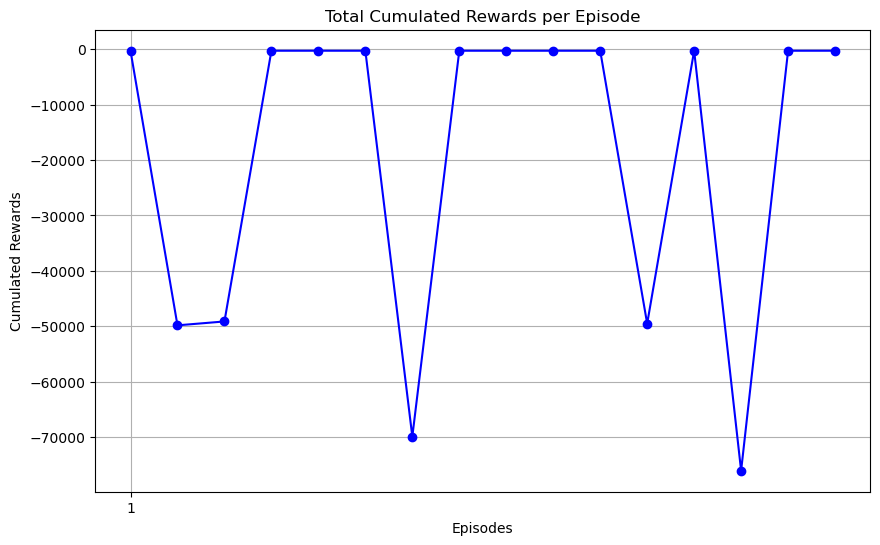

In [4]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

## 2. Evaluation

In [5]:

import scenario
import json
import numpy as np
import os

# Générer les scénarios
scenarios = scenario.generate_scenarios(11)

# Créer le dossier eval_configs
folder_path = 'eval_configs'
os.makedirs(folder_path, exist_ok=True)

# Sauvegarde chaque scénario dans un fichier unique
for i, scenario in enumerate(scenarios, start=1):
    filename = os.path.join(folder_path, f"config_{i}.json")
    with open(filename, "w") as f:
        json.dump(scenario, f, indent=4)
    print(f"Scénario {i} sauvegardé dans {filename}")

Scénario 1 sauvegardé dans eval_configs/config_1.json
Scénario 2 sauvegardé dans eval_configs/config_2.json
Scénario 3 sauvegardé dans eval_configs/config_3.json
Scénario 4 sauvegardé dans eval_configs/config_4.json
Scénario 5 sauvegardé dans eval_configs/config_5.json
Scénario 6 sauvegardé dans eval_configs/config_6.json
Scénario 7 sauvegardé dans eval_configs/config_7.json
Scénario 8 sauvegardé dans eval_configs/config_8.json
Scénario 9 sauvegardé dans eval_configs/config_9.json
Scénario 10 sauvegardé dans eval_configs/config_10.json
Scénario 11 sauvegardé dans eval_configs/config_11.json


In [6]:
eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 10)]

In [ ]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)


--- Evaluating Configuration: ./eval_configs/config_1.json ---
Episode 1/10, Step 5, Reward: 0.23, Evacuated: 0, Deactivated: 0

In [ ]:
display(all_results)

In [ ]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)